In [3]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import hinge_loss
from AEspeech import AEspeech
import pdb
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

C:\Users\Gabriel\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
PATH=os.getcwd()

mod="CAE"
rep='wvlt'

results_path=PATH+"/pdSpanish/classResults/svm/"+mod+'_'+rep+'Results.pkl'
results=pd.read_pickle(results_path)

In [14]:
UTTERS=['pataka','kakaka','pakata','papapa','petaka','tatata']
for utter in UTTERS:
    grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'Grid.pkl')
    print("The best parameters are for utterance: %s are %s with a score of %0.2f"
      % (utter, grid.best_params_, grid.best_score_))

The best parameters are for utterance: pataka are {'C': 138.94954943731375, 'degree': 1, 'gamma': 5.179474679231212e-06, 'kernel': 'rbf'} with a score of 0.67
The best parameters are for utterance: kakaka are {'C': 3727.593720314942, 'degree': 1, 'gamma': 1.3894954943731361e-05, 'kernel': 'poly'} with a score of 0.64
The best parameters are for utterance: pakata are {'C': 8483.428982440726, 'degree': 1, 'gamma': 5.179474679231212e-06, 'kernel': 'rbf'} with a score of 0.73
The best parameters are for utterance: papapa are {'C': 26.826957952797258, 'degree': 1, 'gamma': 1.3894954943731361e-05, 'kernel': 'poly'} with a score of 0.62
The best parameters are for utterance: petaka are {'C': 43939.70560760795, 'degree': 1, 'gamma': 5.179474679231202e-09, 'kernel': 'poly'} with a score of 0.59
The best parameters are for utterance: tatata are {'C': 8483.428982440726, 'degree': 1, 'gamma': 5.179474679231212e-06, 'kernel': 'poly'} with a score of 0.67


In [15]:
results

,pataka,kakaka,pakata,papapa,petaka,tatata
train_acc,0.797778,0.958889,1,0.667778,0.671111,0.955556
test_acc,0.69,0.59,0.63,0.64,0.61,0.69
bin_class,"{45: [0.04020102392736682, 0.9597989760726332]...","{4: [0.5293598171969871, 0.47064018280301295],...","{11: [0.46377050300404604, 0.5362294969959539]...","{47: [0.41352802515138437, 0.5864719748486156]...","{2: [0.3139827877138021, 0.686017212286198], 8...","{42: [0.44723246046389215, 0.5527675395361079]..."
class_report,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...,{0: ' precision recall f1-sco...


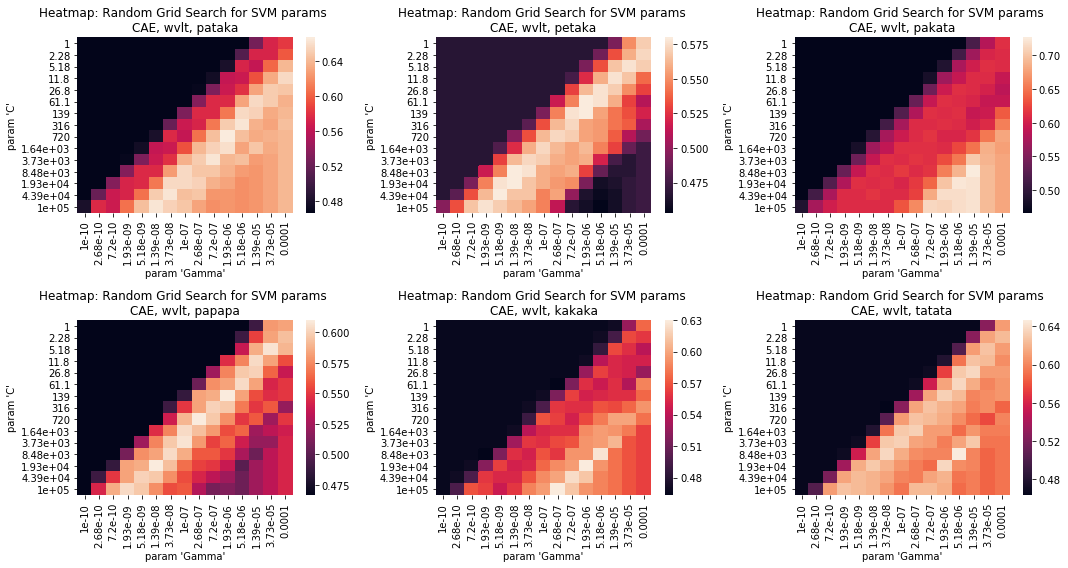

In [16]:
fig,ax=plt.subplots(2,3,figsize=(15,8))

for uItr,utter in enumerate(UTTERS):
    row_itr=np.mod(uItr,2)
    col_itr=np.mod(uItr,3)
    grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'Grid.pkl')
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),values='mean_test_score', index='param_C',columns='param_gamma')
    g = sns.heatmap(pvt,ax=ax[row_itr][col_itr])
    g.set_ylabel("param 'C'")
    g.set_xlabel("param 'Gamma'")
    g.set_title('Heatmap: Random Grid Search for SVM params \n'+mod+", "+rep+", "+utter)
    ylabels = ['{:,.3g}'.format(y) for y in pvt.index]
    g.set_yticklabels(ylabels)
    xlabels = ['{:,.3g}'.format(x) for x in pvt.columns]
    g.set_xticklabels(xlabels)

plt.tight_layout()

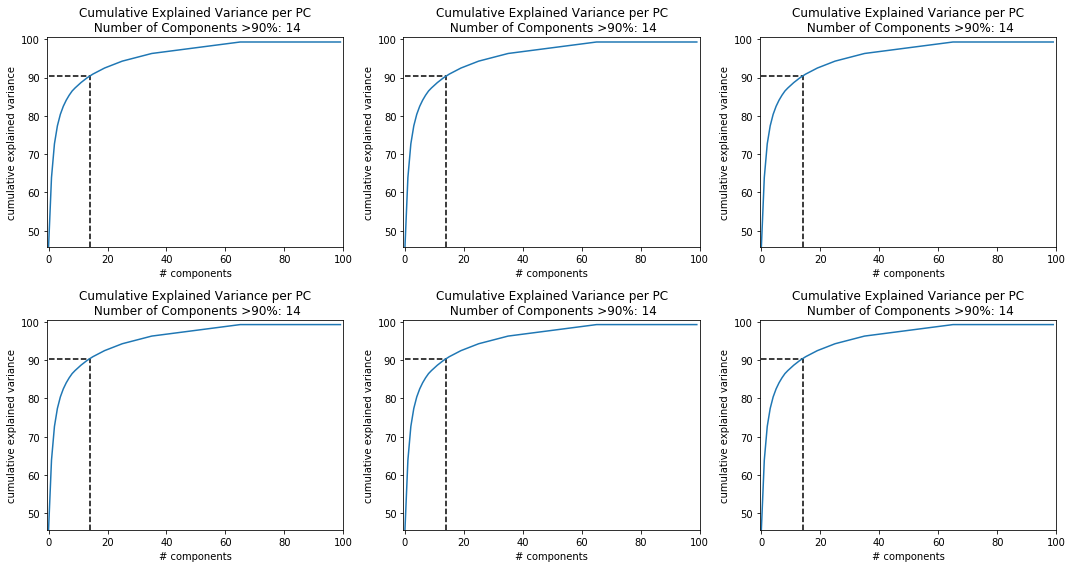

In [17]:
"""
ADD choice number of pcs (>90% cumultive variance) 
"""
fig,ax=plt.subplots(2,3,figsize=(15,8))

for uItr,utter in enumerate(UTTERS):
    row_itr=np.mod(uItr,2)
    col_itr=np.mod(uItr,3)
    pc_data=pd.read_pickle(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+utter+'_'+rep+'_pc.pkl')
    x=min(np.where(pc_data.loc['pc_var']['pataka']>90)[0])
    y=pc_data.loc['pc_var']['pataka'][x]
    
    ax[row_itr][col_itr].plot(pc_data.loc['pc_var']['pataka'])
    ax[row_itr][col_itr].vlines(x, 0, y, linestyle="dashed")
    ax[row_itr][col_itr].hlines(y, 0, x, linestyle="dashed")
    ax[row_itr][col_itr].set_title("Cumulative Explained Variance per PC\n Number of Components >90%: "+str(x))
    ax[row_itr][col_itr].set_xlabel("# components")
    ax[row_itr][col_itr].set_ylabel("cumulative explained variance")
    ax[row_itr][col_itr].set_xlim([-.5, 100])
    ax[row_itr][col_itr].set_ylim([min(pc_data.loc['pc_var']['pataka']), 100.5])
    
plt.tight_layout()

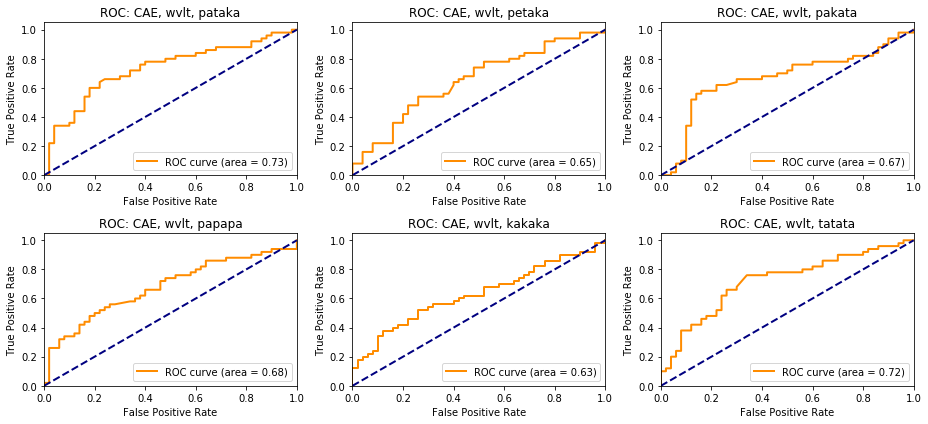

In [19]:
y_scores=np.zeros((100*len(UTTERS),2))
y_tests=np.zeros((100*len(UTTERS),2))
y_score=np.zeros((100,2))
y_test=np.zeros((100,2))
num_pdHc_tests=4 #must be even (same # of test pds and hcs per iter)
                  
fig,ax=plt.subplots(2,3,figsize=(13, 6))
for uItr,utter in enumerate(UTTERS):
    y_score=np.zeros((100,2))
    y_test=np.zeros((100,2))
    
    for j in range(100):
        y_score[j]+=np.array(list((results[utter]['bin_class'].values()))[j])
        if np.mod(j,2)==0:
            y_test[j,:]=np.vstack((np.zeros(1),np.ones(1))).T
        if np.mod(j,2)==1:
            y_test[j,:]=np.vstack((np.ones(1),np.zeros(1))).T
    
    y_scores[uItr*100:(uItr+1)*100]=y_score
    y_tests[uItr*100:(uItr+1)*100]=y_test
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    lw = 2
    mgc=1
    row_itr=np.mod(uItr,2)
    col_itr=np.mod(uItr,3)
    ax[row_itr][col_itr].plot(fpr[mgc], tpr[mgc], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[mgc])
    ax[row_itr][col_itr].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax[row_itr][col_itr].set_xlim([0.0, 1.0])
    ax[row_itr][col_itr].set_ylim([0.0, 1.05])
    ax[row_itr][col_itr].set_xlabel('False Positive Rate')
    ax[row_itr][col_itr].set_ylabel('True Positive Rate')
    ax[row_itr][col_itr].set_title('ROC: '+mod+", "+rep+", "+utter)
    ax[row_itr][col_itr].legend(loc="lower right")
#     plt.show()
plt.tight_layout()


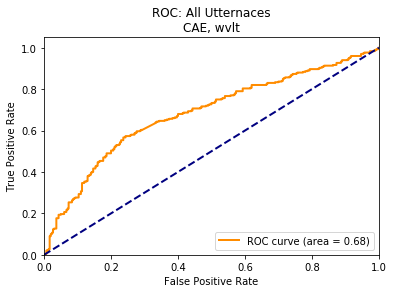

In [20]:
fpr=dict()
tpr=dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_tests[:, i]), np.array(y_scores[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
mgc=1
plt.plot(fpr[mgc], tpr[mgc], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[mgc])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: All Utternaces\n'+mod+", "+rep)
plt.legend(loc="lower right")

In [4]:
PATH=os.getcwd()

mod="CAE"
rep='wvlt'
aggResultsPath=PATH+"/pdSpanish/classResults/svm/"+mod+'_'+rep+'_aggResults.pkl'
aggResults=pd.read_pickle(aggResultsPath)

In [7]:
UTTERS=['pataka','kakaka','pakata','papapa','petaka','tatata']

grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+rep+'aggGrid.pkl')
print("The best parameters are: %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are: {'C': 2154.4346900318847, 'degree': 1, 'gamma': 1.4677992676220675e-05, 'kernel': 'rbf'} with a score of 0.67


[Text(0.5, 0, '1e-08'),
 Text(1.5, 0, '1.47e-08'),
 Text(2.5, 0, '2.15e-08'),
 Text(3.5, 0, '3.16e-08'),
 Text(4.5, 0, '4.64e-08'),
 Text(5.5, 0, '6.81e-08'),
 Text(6.5, 0, '1e-07'),
 Text(7.5, 0, '1.47e-07'),
 Text(8.5, 0, '2.15e-07'),
 Text(9.5, 0, '3.16e-07'),
 Text(10.5, 0, '4.64e-07'),
 Text(11.5, 0, '6.81e-07'),
 Text(12.5, 0, '1e-06'),
 Text(13.5, 0, '1.47e-06'),
 Text(14.5, 0, '2.15e-06'),
 Text(15.5, 0, '3.16e-06'),
 Text(16.5, 0, '4.64e-06'),
 Text(17.5, 0, '6.81e-06'),
 Text(18.5, 0, '1e-05'),
 Text(19.5, 0, '1.47e-05'),
 Text(20.5, 0, '2.15e-05'),
 Text(21.5, 0, '3.16e-05'),
 Text(22.5, 0, '4.64e-05'),
 Text(23.5, 0, '6.81e-05'),
 Text(24.5, 0, '0.0001')]

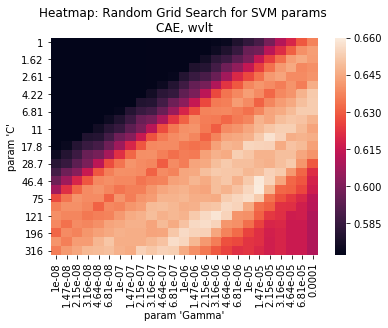

In [12]:
grid=joblib.load(PATH+"/pdSpanish/classResults/svm/params/"+mod+'_'+rep+'aggGrid.pkl')
pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),values='mean_test_score', index='param_C',columns='param_gamma')
g = sns.heatmap(pvt)
g.set_ylabel("param 'C'")
g.set_xlabel("param 'Gamma'")
g.set_title('Heatmap: Random Grid Search for SVM params \n'+mod+", "+rep)
ylabels = ['{:,.3g}'.format(y) for y in pvt.index]
g.set_yticklabels(ylabels)
xlabels = ['{:,.3g}'.format(x) for x in pvt.columns]
g.set_xticklabels(xlabels)


In [8]:
aggResults

,pataka,kakaka,pakata,papapa,petaka,tatata
train_acc,0,0,0,0,0,0.838333
test_acc,0,0,0,0,0,0.606667
bin_class,{},{},{},{},{},"{17: [0.4337813075253891, 0.566218692474611], ..."
class_report,{},{},{},{},{},{0: ' precision recall f1-sco...
